In [0]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [0]:
import pandas as pd
import numpy as np
data  =  pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
data = data[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]
data["Gender"] = data["Gender"].astype('category')


**Interaction Term**

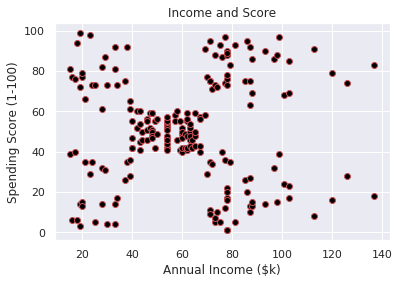

In [0]:
#Quick Scatter Plot of Income vs Spending Score
import matplotlib.pyplot as plt
import pandas as pd

gen = data['Gender']
score = data['Spending Score (1-100)']
income = data['Annual Income (k$)']

plt.scatter(income, score, edgecolors='r', color= 'black')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income and Score')
plt.show()

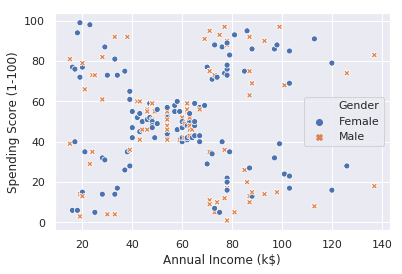

In [0]:
#Scatter plot of Income vs Spending Score, split by gender
import seaborn as sns; sns.set()

ax = sns.scatterplot(x=income, y=score, hue=gen, style = gen)

**Stepwise, Forward, Backward Feature Selection**

In [0]:
import statsmodels.api as sm

ImportError: ignored

*This is R Code*

data = read_csv("Mall_Customers.csv")

library(tidyverse)

library(caret)

library(leaps)

library(MASS)

names(data) <- c("gender", "age",'income','score')

full.model <- lm(score ~., data = data)

summary(full.model)

AIC(full.model)

BIC(full.model)


step.model <- stepAIC(full.model, direction = "both", 
                      trace = FALSE)
                      
 summary(step.model)
 
AIC(step.model)

BIC(step.model)


forward.model = step.model <- stepAIC(full.model, direction = "forward", 
                                      trace = FALSE)
                                      
 summary(forward.model)
 
AIC(forward.model)

BIC(forward.model)


backwards.model = step.model <- stepAIC(full.model, direction = "backward", 
                                        trace = FALSE)
                                        
summary(backwards.model)

AIC(backwards.model)

BIC(backwards.model)



**Cycling through all possible combinations of Predictors with Python**

In [0]:
gender = []
gen = data['Gender']
for i in range(len(gen)):
  if gen[i] == 'Male':
    gender.append(1)
  if gen[i] == 'Female':
    gender.append(0)
    

In [0]:
data['Gender'] = gender

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
data["Gender"] = data["Gender"].astype('category')
x = data[['Gender','Age','Annual Income (k$)']]
y = data[['Spending Score (1-100)']]
model.fit(x, y)
r_sq = model.score(x, y)
r_sq #GIves the R2 of that specific model

0.10860622655322894

In [0]:
from itertools import combinations

input = 'Gender','Age','Annual Income (k$)'

output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])
output #So just iterate through all of these possible X combinations

[[],
 ['Gender'],
 ['Age'],
 ['Annual Income (k$)'],
 ['Gender', 'Age'],
 ['Gender', 'Annual Income (k$)'],
 ['Age', 'Annual Income (k$)'],
 ['Gender', 'Age', 'Annual Income (k$)']]

In [0]:
rsq = []
for i in range(1,7):
  x = data[output[i]]
  model.fit(x,y)
  r_sq = model.score(x, y)
  rsq.append(r_sq)

print(np.max(rsq)) #This is the best possible R2 
rsq #Suggest to use Gender, and Annual Income
 

0.10854140775241583


[0.0033766255785750987,
 0.10707740876869032,
 9.806640037357539e-05,
 0.10854140775241583,
 0.003550912368418535,
 0.10711158828485168]